In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


cars = pd.read_csv('../vehicles_us.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
cars.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
cars['model_year'] = cars['model_year'].astype('Int64')

cars['date_posted'] = pd.to_datetime(cars['date_posted'], format='%Y-%m-%d')

cars['is_4wd'] = cars['is_4wd'].fillna(0).astype(bool)

cars['paint_color'] = cars['paint_color'].fillna('unknown')

cars.info()
cars.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  Int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 4.8+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,<NA>,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19
9,9200,2008,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17


In [5]:
cars.duplicated().sum()

np.int64(0)

In [6]:
# There are no duplicated rows in the dataset

cheap_cars = cars[cars['price'] < 100]
print(cheap_cars)

       price  model_year                model  condition  cylinders    fuel  \
405        1        2014     chevrolet camaro  excellent        6.0     gas   
3063       1        1998  chevrolet silverado       good        8.0     gas   
3808       1        2007      chevrolet tahoe       good        8.0     gas   
3902       1        1996           ford f-150       fair        NaN     gas   
4140       1        2004  chevrolet silverado  excellent        8.0  diesel   
...      ...         ...                  ...        ...        ...     ...   
50245      1        1986  chevrolet silverado       good        8.0     gas   
50393      1        2003    gmc sierra 2500hd       good        8.0  diesel   
50430      5        2011        toyota sienna       good        6.0     gas   
50971     10        2012         toyota prius  excellent        4.0  hybrid   
51256      1        2012       honda civic lx  excellent        4.0     gas   

       odometer transmission       type paint_color

In [7]:
expensive_cars = cars[cars['price'] > 100000]
print(expensive_cars)

        price  model_year                     model  condition  cylinders  \
1309   189000        2014                ford f-150       good        6.0   
1668   189000        2014                ford f-150       good        6.0   
11359  300000        2015                  ram 2500  excellent        NaN   
12504  375000        1999           nissan frontier       good        6.0   
20700  109999        <NA>        chevrolet corvette        new        8.0   
22833  115000        2012     ford f-250 super duty       good        8.0   
24999  140000        2004                  ram 2500       good        6.0   
27375  189000        2014                ford f-150       good        6.0   
29810  123456        2000        chevrolet suburban       good        8.0   
30634  189000        2014                ford f-150       good        6.0   
33434  189000        2014                ford f-150       good        6.0   
34206  175000        2004         gmc sierra 2500hd       good        8.0   

In [8]:
# adding this filter because there are many outliers in the price column, no one would sell a car for less than $100, and the cars that are
# sold for more than $110,000 are all old cars (from 1990s and early 2000s) which is very unlikely.
# I kept the Chevy Corvette as the highest price car because it is a sports car and it is reasonable to be sold for that price.
filtered_cars = cars[(cars['price'] >= 100) & (cars['price'] <= 110000)].copy()


In [9]:
print(filtered_cars['model'].unique())


['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'f

In [10]:
def categorize_brand(row):
    """ Categorize car brands based on the model name."""

    model = row['model'].lower()
    if 'ford' in model:
        return 'Ford'
    elif 'chevrolet' in model or 'chevy' in model:
        return 'Chevrolet'
    elif 'toyota' in model:
        return 'Toyota'
    elif 'honda' in model:
        return 'Honda'
    elif 'nissan' in model:
        return 'Nissan'
    elif 'jeep' in model:
        return 'Jeep'
    elif 'bmw' in model:
        return 'BMW'
    elif 'mercedes' in model or 'benz' in model:
        return 'Mercedes-Benz'
    elif 'acura' in model:
        return 'Acura'
    elif 'volkswagen' in model:
        return 'Volkswagen'
    elif 'hyundai' in model:
        return 'Hyundai'
    elif 'chrysler' in model:
        return 'Chrysler'
    elif 'kia' in model:
        return 'Kia'
    elif 'dodge' in model or 'ram' in model:
        return 'Dodge'
    elif 'gmc' in model:
        return 'GMC'
    elif 'subaru' in model:
        return 'Subaru'
    elif 'cadillac' in model:
        return 'Cadillac'
    elif 'buick' in model:
        return 'Buick'
    else:
        return 'Other'
filtered_cars['brand'] = filtered_cars.apply(categorize_brand, axis=1)
print(filtered_cars['brand'].value_counts())

    

brand
Ford             12525
Chevrolet        10453
Toyota            5334
Dodge             4367
Honda             3431
Jeep              3189
Nissan            3142
GMC               2342
Subaru            1269
Hyundai           1171
Volkswagen         863
Chrysler           838
Kia                585
Cadillac           322
Buick              271
BMW                267
Acura              236
Mercedes-Benz       41
Name: count, dtype: int64


In [11]:
print(filtered_cars['fuel'].unique())
print(filtered_cars['fuel'].value_counts())

['gas' 'diesel' 'other' 'hybrid' 'electric']
fuel
gas         46425
diesel       3701
hybrid        407
other         108
electric        5
Name: count, dtype: int64


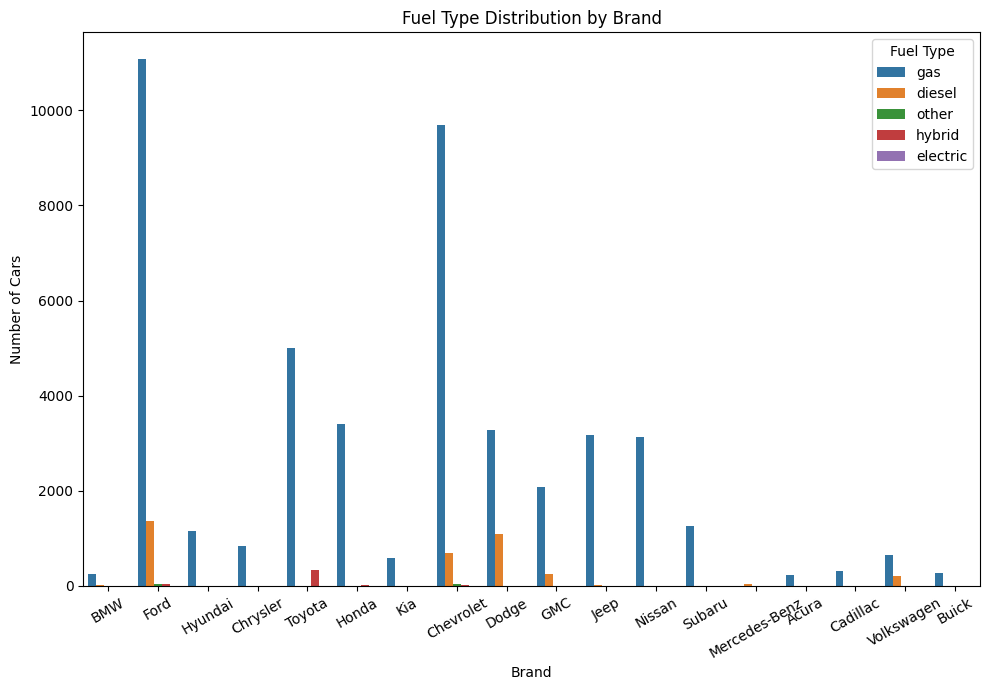

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(data=filtered_cars, x='brand', hue='fuel')
plt.title('Fuel Type Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.xticks(rotation=30)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

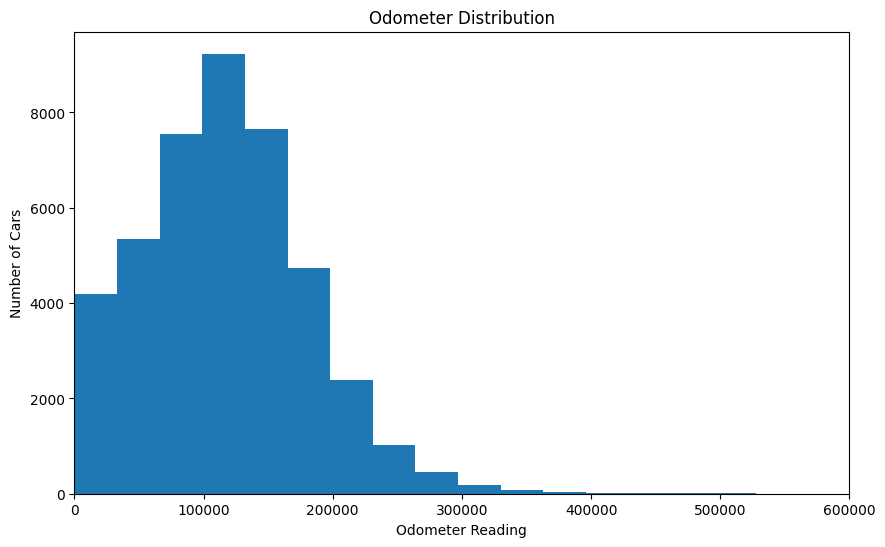

In [13]:
filtered_cars['odometer'].plot(kind='hist', bins=30, title='Odometer Distribution', figsize=(10,6))
plt.ylabel('Number of Cars')
plt.xlabel('Odometer Reading')
plt.xlim(0, 600000)
plt.show()

# this histogram is more readable than the fuel types, will filter on condition of cars so there is more data to visualize.
# there is such a big difference in gas vs other fuel types, that it is hard to see the distribution of other fuel types.
# since the variety of conditions is more level, it will be more interesting to visualize.
# will create a multiselect widget to filter on condition of cars in app.py

In [14]:
print(filtered_cars['condition'].unique())
print(filtered_cars['condition'].value_counts())

['good' 'like new' 'fair' 'excellent' 'salvage' 'new']
condition
excellent    23986
good         20099
like new      4711
fair          1596
new            139
salvage        115
Name: count, dtype: int64


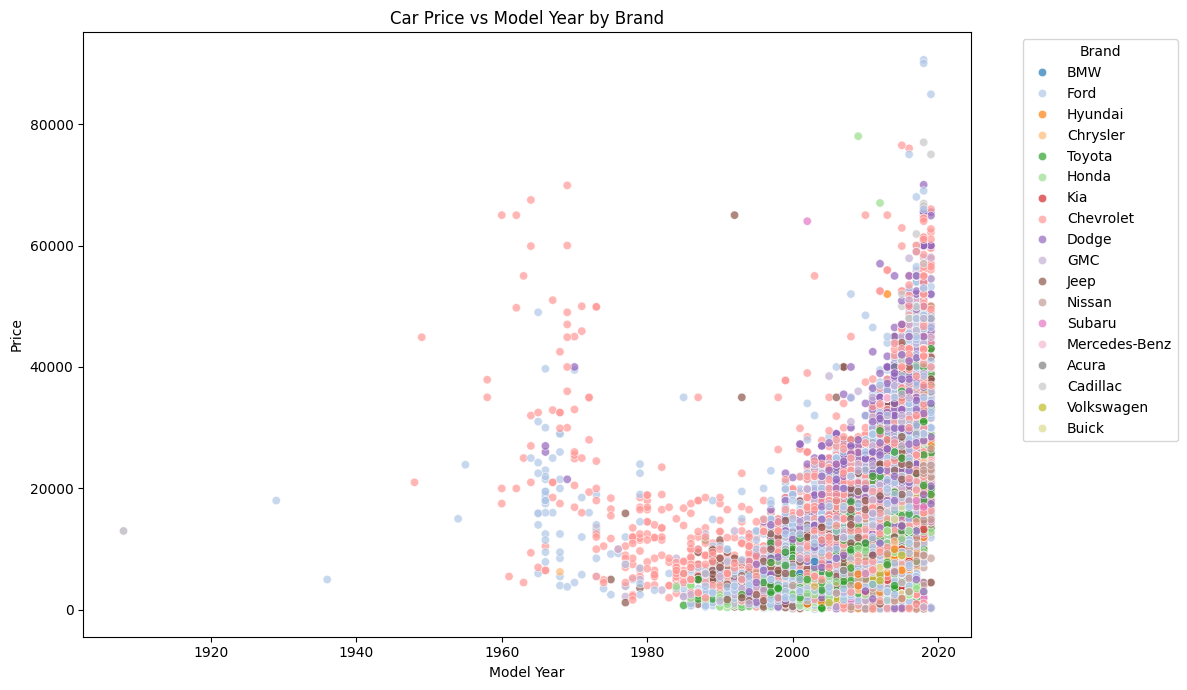

In [15]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=filtered_cars,
    x='model_year',
    y='price',
    hue='brand',
    palette='tab20',
    alpha=0.7
)
plt.title('Car Price vs Model Year by Brand')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [16]:
print(filtered_cars['model_year'].min())
print(filtered_cars['model_year'].max())

1908
2019
